In [1]:
import os
new_directory = "/data/xyh_desktop/mapping/github/DSCT/src/"
os.chdir(new_directory)



In [2]:
import DSCT_load
import DSCT_train
import diopy
import torch
import scanpy as sc

In [3]:
gene_number=120

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#read
sc_data=diopy.input.read_h5(file = '~/DSCT/sc/sc_anno_CTX_mouse.h5')#reference
   
st_data=diopy.input.read_h5(file = "~/DSCT/st/CTX_merfish_mouse.h5")#val
    


In [4]:
#parameter
result_save_path="~/DSCT/result/MERFISH_mouse_predictions_"+str(gene_number)
anno="Type"
train_num=80
model_save_path="~/DSCT/model/"+str(gene_number)+"_"
num_classes = len(set(sc_data.obs[anno]))

In [5]:
#data processing
sc_data,st_data=DSCT_load.fmap_load(sc_data,st_data,anno,gene_number,device)

/home/zju/miniconda3/envs/DSCT/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/zju/miniconda3/envs/DSCT/lib/python3.11/site-packages/cosg/cosg.py:115: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


**finished identifying marker genes by COSG**


/home/zju/miniconda3/envs/DSCT/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Epoch [0/10], Loss: 2.7701
Epoch [2/10], Loss: 2.6870
Epoch [4/10], Loss: 2.5778
Epoch [6/10], Loss: 2.4564
Epoch [8/10], Loss: 2.3233


In [6]:
#traning&output
DSCT_train.fmap_train(sc_data,st_data,result_save_path,model_save_path,train_num,num_classes,anno,device)

/data/xyh_desktop/mapping/github/DSCT/src/DSCT_train.py:47: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_data.obs["type_integer"] = cell_types_integer


Epoch [10/80], Loss: 1.2158, Validation Accuracy: 62.49%
Epoch [20/80], Loss: 0.7161, Validation Accuracy: 72.83%
Epoch [30/80], Loss: 0.5391, Validation Accuracy: 82.98%
Epoch [40/80], Loss: 0.4452, Validation Accuracy: 83.22%
Epoch [50/80], Loss: 0.3963, Validation Accuracy: 84.03%
Epoch [60/80], Loss: 0.3919, Validation Accuracy: 87.65%
Epoch [70/80], Loss: 0.3501, Validation Accuracy: 88.23%
Epoch [80/80], Loss: 0.3062, Validation Accuracy: 89.66%


/data/xyh_desktop/mapping/github/DSCT/src/DSCT_train.py:136: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  st_data.obs['predicted_classes'] = predicted_labels


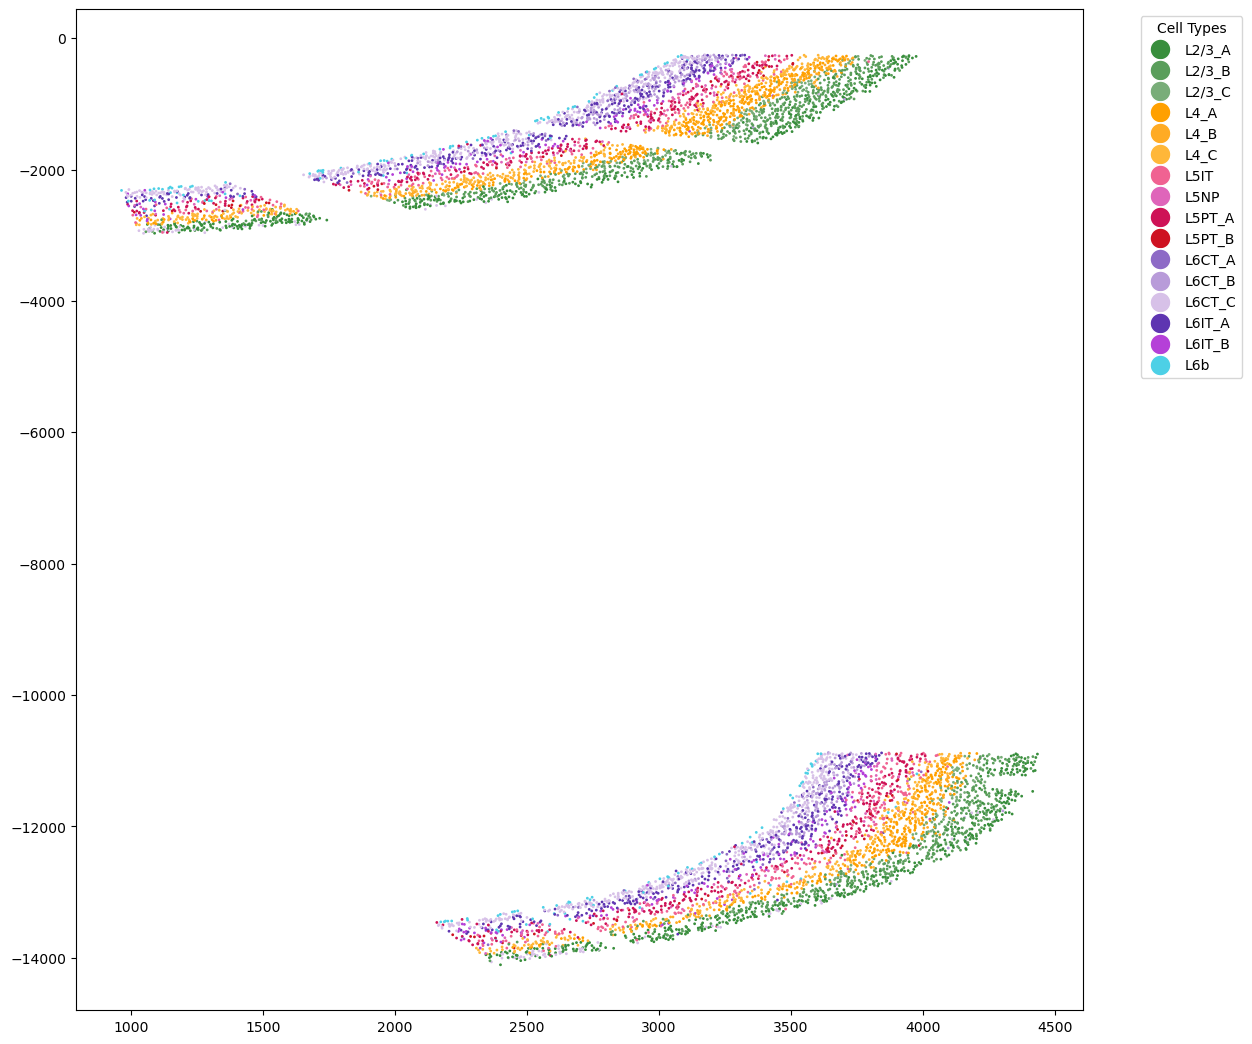

In [8]:
#plot
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

coor_x = st_data.obs['imagerow']
coor_y = st_data.obs['imagecol']
predicted_labels = st_data.obs['predicted_classes']
cell_type_to_color = {

    'L2/3_A': "#388E3C", 
    'L2/3_B': "#5A9E5B", 
    'L2/3_C': "#79AD79", 
    'L4_A': "#FFA000",   
    'L4_B': "#FFAB24",  
    'L4_C': "#FFB739",  
    'L5IT': "#F06292", 
    'L5NP': "#DF65BA",     
    'L5PT_A': "#CE1256",  
    'L5PT_B': "#CE1221", 
    'L6CT_A': "#8D6AC6",    
    'L6CT_B': "#B89BD9", 
    'L6CT_C': "#D7C1E8", 
    'L6IT_A': "#5E35B1",    
    'L6IT_B': "#B540D8",    
    'L6b': "#4DD0E6"       
}


colors = [cell_type_to_color[label] for label in predicted_labels]

fig, ax = plt.subplots(figsize=(13, 13))
scatter = ax.scatter(coor_x, coor_y, c=colors, s=1)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=cell_type, 
                          markerfacecolor=color, markersize=15) 
                   for cell_type, color in cell_type_to_color.items()]
ax.legend(handles=legend_elements, title='Cell Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
